In [1]:
import pandas as pd
import numpy as np

In [2]:
data = [10, 20, 30, 40, 50]    # list
sr = pd.Series(data, index=['a', 'b', 'c', 'd', 'e'], name='kor')

In [5]:
print(sr)
print(sr.max()) # 가장 끝 값
print(sr.min()) # 가장 작은 값
print(sr.idxmax()) # 가장 큰 값의 인덱스

a    10
b    20
c    30
d    40
e    50
Name: kor, dtype: int64
50
10
e


In [8]:
# 45 이하인 데이터의 가장 큰 값을 구하시오.
print(sr[sr<45].max())

40


In [12]:
print(sr.head(2)) # 앞에서 2개
print(sr.tail(2)) # 긑에서 2개

a    10
b    20
Name: kor, dtype: int64
d    40
e    50
Name: kor, dtype: int64


In [26]:
print(sr.nlargest(3))  # 값이 끝 숫자 3개( top 3 )
print(sr.nsmallest(3)) # 값이 작은 숫자 3개( bottom 3 )
print(sr.nlargest(3, keep='last')) # keep: all ,last

e    50
b    40
d    40
Name: kor, dtype: int64
a    10
c    30
b    40
Name: kor, dtype: int64
e    50
d    40
b    40
Name: kor, dtype: int64


In [32]:
print(sr.sum())  # [전체 합]
print(sr.mean()) # [평균 값]
print(sr.median()) # [중간 값] 데이터를 정렬 했을 경우에 가운데 값
print(sr.quantile([0.25, 0.5, 0.75])) # 데이터를 정렬했을 때 35%, 50%, 75%

150
30.0
30.0
0.25    20.0
0.50    30.0
0.75    40.0
Name: kor, dtype: float64


In [33]:
print(sr.std()) # 표준편차(값들이 얼마간의 간격이 있는지?)

15.811388300841896


In [36]:
sr['b'] = 30
print(sr)
print(sr.unique()) # 중복 데이터 제거

a    10
b    30
c    30
d    40
e    50
Name: kor, dtype: int64
[10 30 40 50]


In [37]:
print(sr.value_counts()) # 데이터의 그룹핑 값

30    2
10    1
40    1
50    1
Name: kor, dtype: int64


In [48]:
sr['b'] = 20
def fn(v): # 조건 별로 다른게 결과를 얻을수 있다.
    return v + 1 if v < 30 else v + 2 # python에는 없지만 다른 언어에 있는 삼항연산과 동일( (v<30 ? v+1 : v+2) )

print(sr.apply(fn)) # 배열의 갯수만큼 반복하여 호출
print(sr.map(fn))   # map을 이용하여 반복 호출
print(sr.apply(lambda v: v+1 if v<30 else v+2)) # 람다식 활용( 람다식:익명함수=임시함수)

a    11
b    21
c    32
d    42
e    52
Name: kor, dtype: int64
a    11
b    21
c    32
d    42
e    52
Name: kor, dtype: int64
a    11
b    21
c    32
d    42
e    52
Name: kor, dtype: int64


In [55]:
#  0 < sr <= 20
# 20 < sr <= 40
# 40 < sr <= 90
print(pd.cut(sr, [0, 20, 40, 90])) # 각 값이 어느 카테고리에 속하는지 구한다.
print(pd.cut(sr, [0, 20, 40, 90], labels=['C학점','B학점','A학점'])) # 학점 계산할 때 사용하면 유용
print(pd.cut(sr, [0, 20, 40, 90]).value_counts()) # 데이터의 그룹핑 값

a     (0, 20]
b     (0, 20]
c    (20, 40]
d    (20, 40]
e    (40, 90]
Name: kor, dtype: category
Categories (3, interval[int64, right]): [(0, 20] < (20, 40] < (40, 90]]
a    C학점
b    C학점
c    B학점
d    B학점
e    A학점
Name: kor, dtype: category
Categories (3, object): ['C학점' < 'B학점' < 'A학점']
(0, 20]     2
(20, 40]    2
(40, 90]    1
Name: kor, dtype: int64


In [3]:
sr.to_csv('sample/07_Series_통계.csv') # 값을 csv 파일로 저장한다.

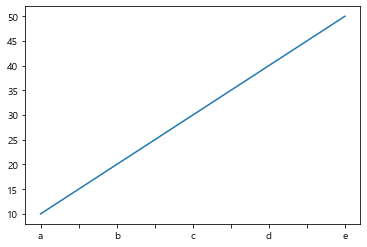

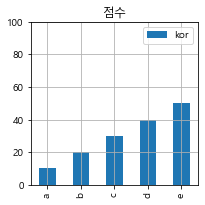

In [70]:
import matplotlib.pyplot as plt # lib가 없다면 설치(차트 lib) => pip3 install matplotlib

# 3 줄은 차트에서 한글 사용할 경우( 한글 깨짐 현상 )
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

sr.plot()
plt.show()

sr.plot(kind='bar', figsize=(3,3), title='점수', grid=True, legend=True, ylim=(0,100))
plt.show()

In [77]:
print(sr.values)
for n in sr: # sr.values
    print(n)

[10 20 30 40 50]
10
20
30
40
50


In [80]:
print(sr.index)
for n in sr.index:
    print(n)

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
a
b
c
d
e


In [82]:
print(sr.items())
for n in sr.items():
    print(n)
for i, v in sr.items():
    print(i, v)

('a', 10)
('b', 20)
('c', 30)
('d', 40)
('e', 50)
a 10
b 20
c 30
d 40
e 50
